In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from numpy import argmax
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [3]:
df = pd.read_excel("exemplo.xlsx")

In [4]:
df.head()

,Class,X,Y
0,A,112,227
1,A,100,139
2,A,126,216
3,A,205,105
4,A,206,100


# TAREFA: Separar A e B com base em X e Y

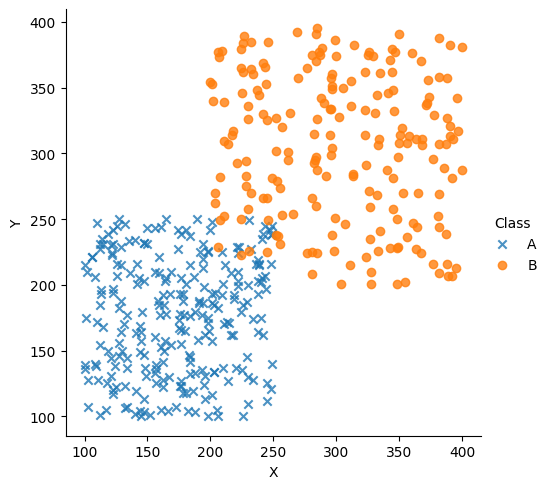

In [5]:
sns.lmplot( x="X", y="Y", data=df, fit_reg=False,hue='Class', legend=True, markers = ['x','o'])
plt.show()

# Tarefa fácil, a principio. Uma inspeção visual resolve

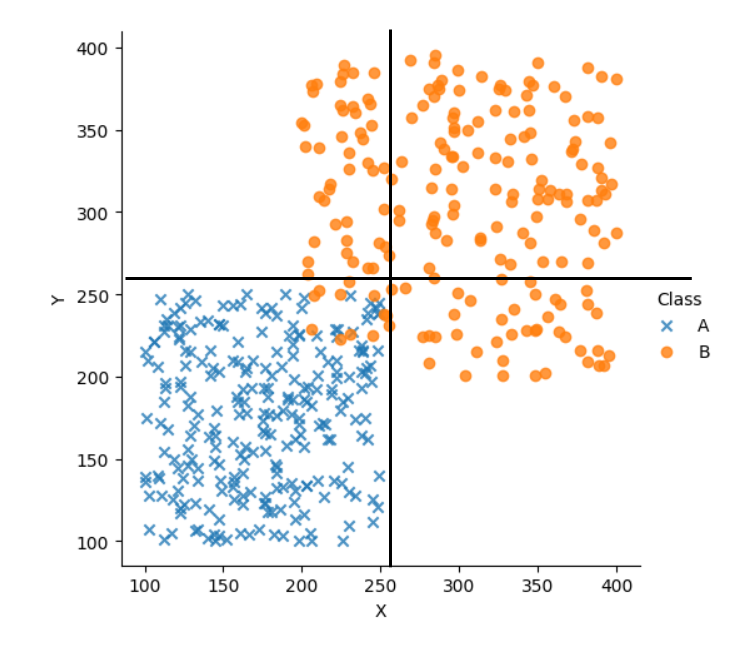

# Mas e se fossem dados mais misturados?

In [7]:
df2 = pd.read_excel("exemplo_2.xlsx")

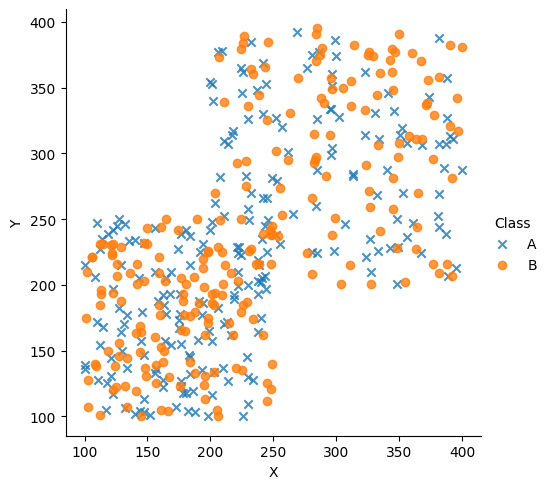

In [9]:
sns.lmplot( x="X", y="Y", data=df2, fit_reg=False,hue='Class', legend=True, markers = ['x','o'])
plt.show()

# Ou se houvessem 3 ou + variáveis para experimentar

# Para casos assim, o modelo de árvore é útil

## Gerar insights de como os dados se comportam
## Montar clusters
## Pegar pequenos grupos de outliers

# *DEFINIÇÃO*

# "Separar dados dispostos no espaço em subespaços mais homogêneos entre si"

# Dois tipos de árvore:

## Classificação - quando querem entender um fenômeno qualitativo

## Regressão - quando querem entender um fenômeno quantitativo

## O algoritmo toma a decisão de partir o espaço com base em uma métrica (indicador), o objetivo é partir em subespaços filhos que são mais homogeneos que o espaço pai

## Cada tipo de árvore tem varias métricas, apresento aqui uma de cada

## Classificação: GINI

* Número que vai de 0 a 0,5 (meio). Sendo que, 0 (zero) significa espaço totalmente homogêneo (separação perfeita) e 0,5 significa o pior cenário, temos 50% de cada classe.
* Sugiro se aprofundar neste indicador e em outros (especialmente Entropia), vale a pena saber os detalhes para ampliar as possibilidades de aplicação

## Regressão: MSE (Quadrado do Erro) = Variância

* Quanto menor, mais homogêneo é o subespaço
* Outra métrica possivel é a MAE (erro absoluto médio), é uma metrica que foca na mediana, ou seja, menos sensivel a outliers

# Exemplo de Árvore de Classificação

In [16]:
salario = pd.read_csv("Salary_Data.csv")

In [17]:
salario.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [18]:
#procurar se ha valores nulos na base
salario.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [19]:
# para seguir, vamos retirar estes valores
salario2 = salario.dropna()

In [20]:
salario2.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [21]:
# No nosso problema queremos saber quem ganha acima da média
salario2['Salary'].mean()

115329.25306061511

# IMPORTANTE: A variavel resposta deve estar no formato 0 ou 1

In [30]:
salario2['acima_media'] = np.where(salario2['Salary'] > 115000, "Acima Média", "Abaixo Média")

C:\Users\gcabr\AppData\Local\Temp\ipykernel_7052\3492118531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salario2['acima_media'] = np.where(salario2['Salary'] > 115000, "Acima Média", "Abaixo Média")


In [31]:
salario2['acima_media_target'] = np.where(salario2['Salary'] > 115000, 1, 0)

C:\Users\gcabr\AppData\Local\Temp\ipykernel_7052\174053359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salario2['acima_media_target'] = np.where(salario2['Salary'] > 115000, 1, 0)


# IMPORTANTE

## Neste exemplo, so vou colocar variaveis quantitativas no X, porém, voces tambem podem usar qualitativas, mas a árvore só aceita numero como entrada, ou seja, cada categoria deveria ter um numero atribuido

## Se for uma variavel que tem ordem (como escolaridade) é facil, basta atribuir 1,2,3...conforme a escolaridade aumenta

## Com variaveis nominais, essa atribuicao fica mais dificil de interpretar na arvore

In [32]:
#Variável resposta
Y = salario2[['acima_media_target']]
#Variaveis explicativas (apenas quantitativas)
X = salario2[['Age','Years of Experience']]

In [40]:
#Ajustando a arvore
clf = tree.DecisionTreeClassifier(max_depth=3, criterion="gini")
clf = clf.fit(X,Y)

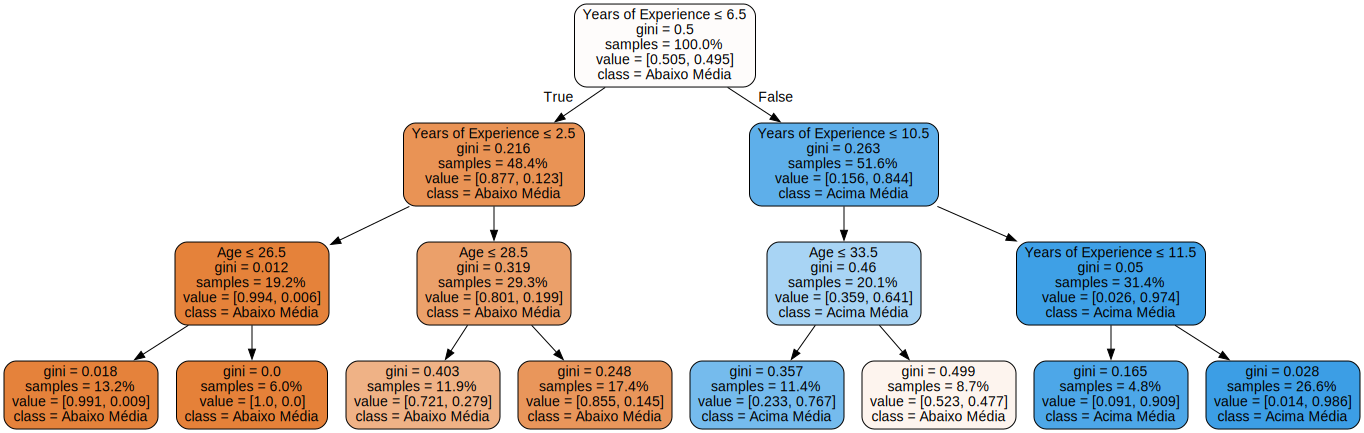

In [36]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=X.columns.values,  
          class_names=salario2['acima_media'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph

# Como saber se uma divisão foi boa?

## Avaliamos o quanto a métria diminuiu na divisão
### Vamos analisar a primeira quebra
* Espaco PAI tinha GINI = 0.5
    * Primeiro espaco filho = 0.216
    * Segundo espaco filho = 0.263
    * Fazendo a média ponderada entre os filhos -> [(0.216 * 0,484) + (0.263 * 0,516)/1] = 0,24
    * Tivemos uma reduçao de 0,26 no indice GINI (0,5 do pai - 0,24 dos filhos)
    
### No final, podemos calcular o GINI dos subespacos finais e ver quanto reduzimos do GINI inicial

### Quanto maior a redução, melhor a árvore

# Alteraçoes na estrutura de crescimento da árvore

## Podemos mudar varias coisas em como a árvore cresce, mas destaco duas

* Max Depth: Qual vai ser o máximo de divisões que a arvore vai realizar

* Min Samples Split: Quantas observacoes um subespaco tem que ter para permitir uma divisão

In [41]:
#Ajustando a arvore
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split = 100, criterion="gini")
clf = clf.fit(X,Y)

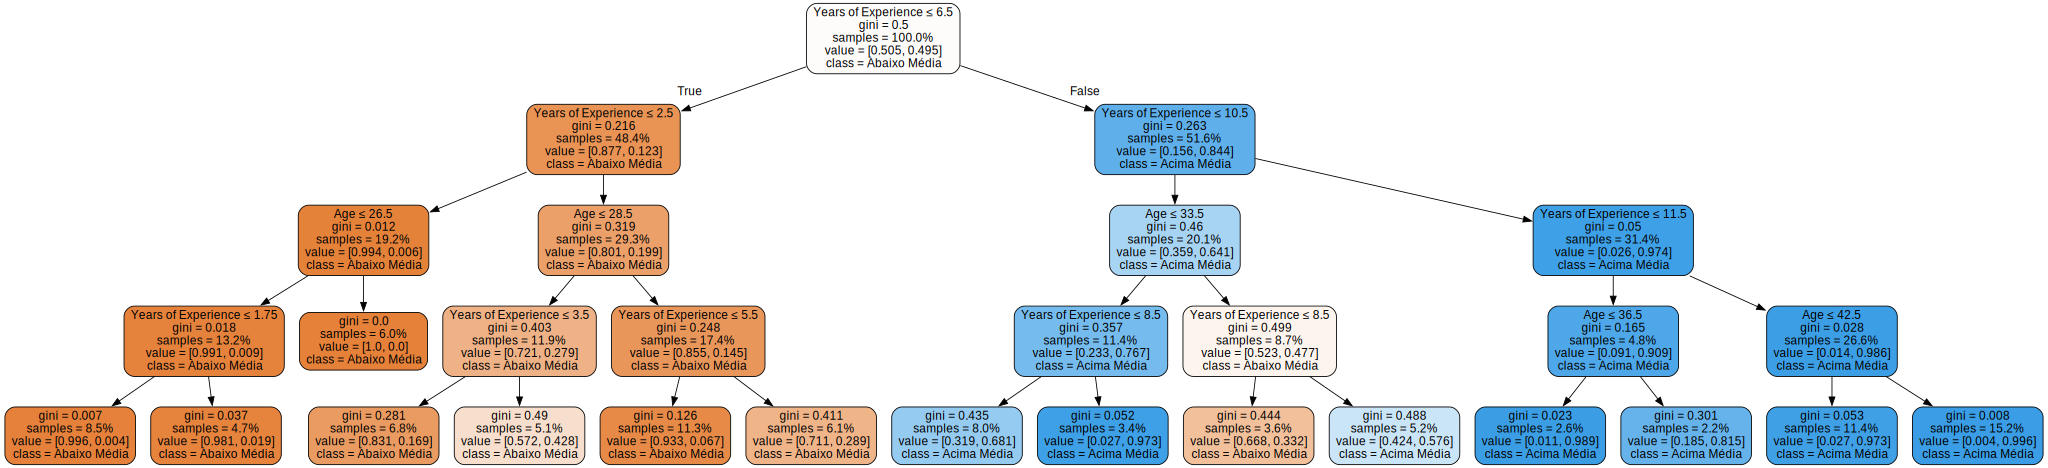

In [38]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=X.columns.values,  
          class_names=salario2['acima_media'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph

# Qual é o ideal? Depende do caso

### Sugestão é colocar uma quantidade que permita que a árvore cresca bem e, depois, realizar o processo de Poda

### Poda consiste em você avaliar as divisões de cima para baixo e ignorar aquelas que não trouxeram grandes ganhos de GINI ou que para o seu problema não faça sentido

# Árvore de Regressão

In [43]:
#Variável resposta
Y = salario2[['Salary']] #peguei a variavel salario de forma quanti
#Variaveis explicativas (apenas quantitativas)
X = salario2[['Age','Years of Experience']]

In [48]:
clf = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=200,criterion = "squared_error")
clf = clf.fit(X,Y)

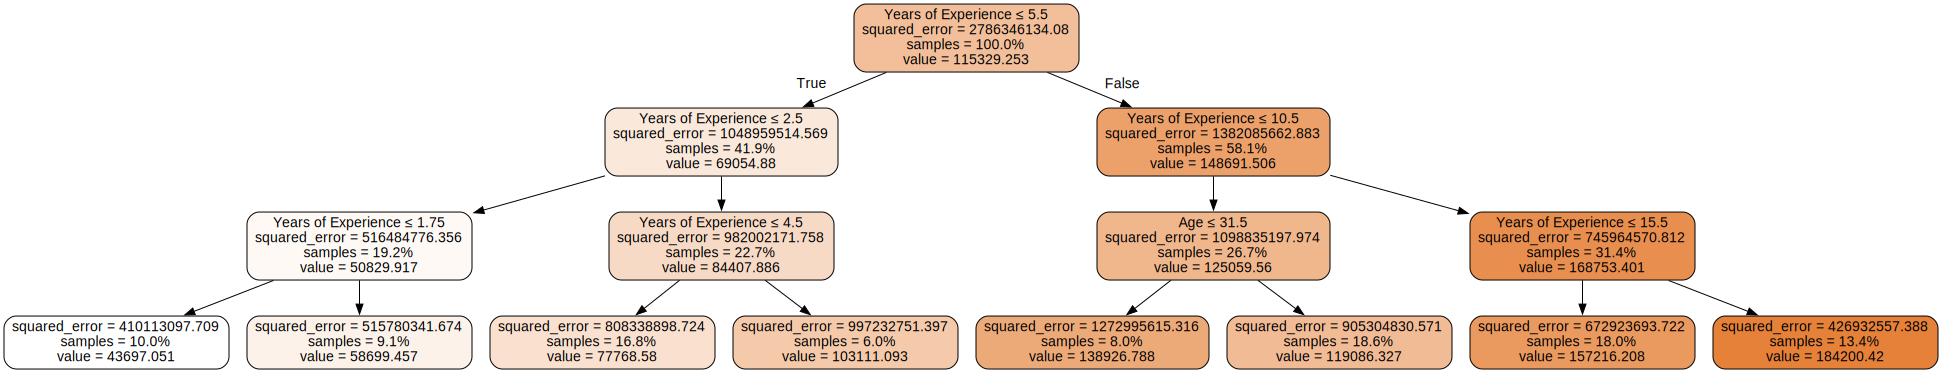

In [49]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=X.columns.values,  
          class_names=salario2['acima_media'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph

# Se usasse o MAE (erro absoluto) ao inves do MSE (erro quadrado) a arvore seria diferente 

In [50]:
clf = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=200,criterion = "absolute_error")
clf = clf.fit(X,Y)

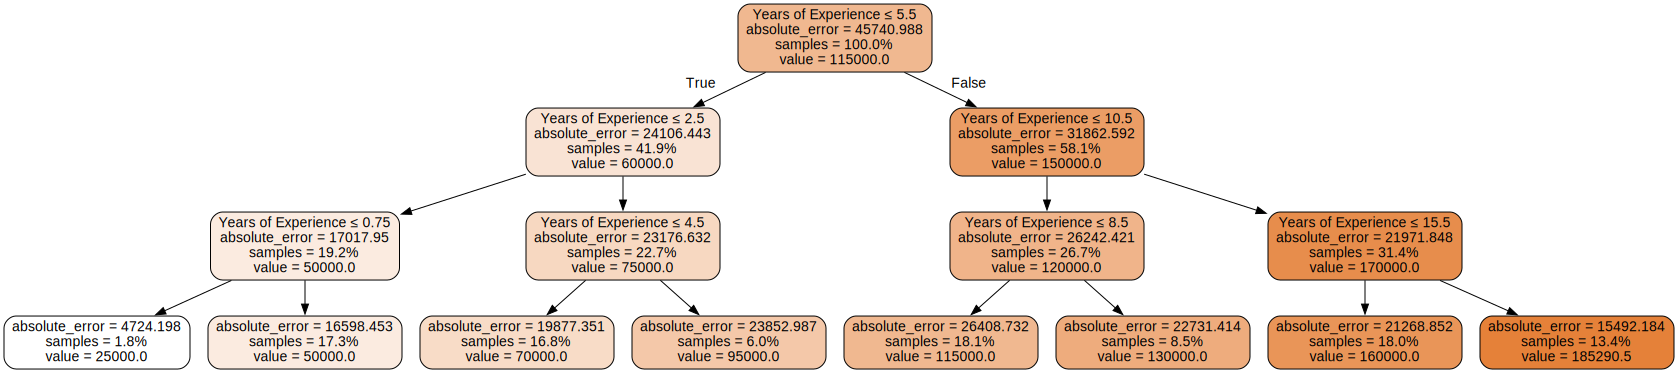

In [51]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=X.columns.values,  
          class_names=salario2['acima_media'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
graph